# <font color = 'red'> Tarea: </font>

Replicar el procedimiento anterior para valoración de opciones 'call', pero en este caso para opciones tipo 'put'.


In [1]:
#importar los paquetes que se van a usar
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import numpy as np
import datetime
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [2]:
# Función para descargar precios de cierre ajustados de varios activos a la vez:
def get_historical_closes(tickers, start_date=None, end_date=None, freq=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Frecuencia de muestreo por defecto (freq='d')
    # Importamos paquetes necesarios
    import pandas as pd
    pd.core.common.is_list_like = pd.api.types.is_list_like
    import pandas_datareader.data as web  
    # Creamos DataFrame vacío de precios, con el índice de las fechas
    closes = pd.DataFrame(columns = tickers, index=web.YahooDailyReader(symbols=tickers[0], start=start_date, end=end_date, interval=freq).read().index)
    # Agregamos cada uno de los precios con YahooDailyReader
    for ticker in tickers:
        df = web.YahooDailyReader(symbols=ticker, start=start_date, end=end_date, interval=freq).read()
        closes[ticker]=df['Adj Close']
    closes.index_name = 'Date'
    closes = closes.sort_index()
    return closes

In [3]:
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

In [33]:
def interval(confianza,put,sigma_est):
    mean_est = put.iloc[-1].Prima
    i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
    i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
    print(i1)
    print(i1)

In [21]:
def put_valuation(ret_aapl,opt_valuar):
    mu = ret_aapl.mean()[0]
    sigma = ret_aapl.std()[0]
    r = 0.0263/360 # Tasa diaria
    K = opt_valuar.Strike
    ndays = (opt_valuar.Expiry.date()-datetime.today().date()).days
    nscen = 100000
    dates = pd.date_range(datetime.today().date(),periods=ndays).astype('str')
    sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r, index=dates)
    S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular
    sim_closes = S0*np.exp(sim_ret.cumsum())
    strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
    put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes,np.zeros([ndays,nscen])).T.mean()}, index=dates)
    return put,sim_closes.iloc[-1].sem()

In [25]:
def put_valuation_hist(ret_aapl,opt_valuar):
    mu = ret_aapl.mean()[0]
    sigma = ret_aapl.std()[0]
    r = 0.0263/360 # Tasa diaria
    K = opt_valuar.Strike
    ndays = (opt_valuar.Expiry.date()-datetime.today().date()).days
    nscen = 100000
    dates = pd.date_range(datetime.today().date(),periods=ndays).astype('str')
    freq, values = np.histogram(ret_aapl+r-mu, bins=2000)
    prob = freq/np.sum(freq)
    ret=np.random.choice(values[1:],ndays*nscen,p=prob)
    sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
    sim_closes_hist = (closes_aapl.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
    strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
    put_hist = pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(strike-sim_closes_hist,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
    return put_hist,sim_closes_hist.iloc[-1].sem()

In [38]:
days_to_valuation=200

In [36]:
ticker = ['FB']

In [37]:
aapl = web.YahooOptions(ticker[0])
aapl_opt = aapl.get_all_data().reset_index()
start_date = '2017-01-01'
closes_aapl = get_historical_closes(ticker, start_date,freq='d')
ret_aapl = calc_daily_ret(closes_aapl)


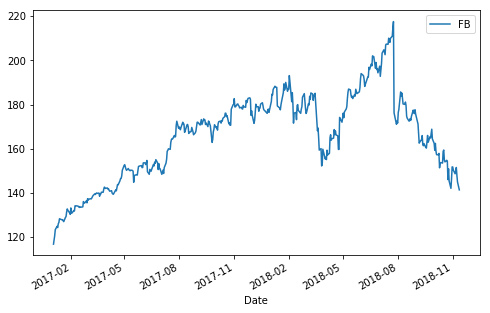

In [6]:
closes_aapl.plot(figsize=(8,5));
plt.legend(ticker);

In [7]:
datetime.today().date()+timedelta(days=days_to_valuation)

datetime.date(2019, 5, 31)

In [8]:
 #aapl_opt.loc[(aapl_opt.Type=='put') & (aapl_opt.Strike==np.round(closes_aapl.iloc[-1,0])+10) & (aapl_opt.Expiry==datetime.today().date()+timedelta(days=days_to_valuation))]
aapl_opt.loc[(aapl_opt.Type=='put') & (aapl_opt.Strike==140) ]

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
298,140.0,2018-11-16,put,...,2018-11-12 17:56:26,2018-11-12 17:37:35,"{'contractSymbol': 'FB181116P00140000', 'strik..."
301,140.0,2018-12-14,put,...,2018-11-12 17:56:26,2018-11-12 17:34:29,"{'contractSymbol': 'FB181214P00140000', 'strik..."
303,140.0,2018-12-21,put,...,2018-11-12 17:56:27,2018-11-12 17:37:41,"{'contractSymbol': 'FB181221P00140000', 'strik..."
305,140.0,2018-12-28,put,...,2018-11-12 17:56:27,2018-11-12 17:28:24,"{'contractSymbol': 'FB181228P00140000', 'strik..."
307,140.0,2019-01-18,put,...,2018-11-12 17:56:27,2018-11-12 17:33:57,"{'contractSymbol': 'FB190118P00140000', 'strik..."
309,140.0,2019-06-21,put,...,2018-11-12 17:56:27,2018-11-12 17:33:23,"{'contractSymbol': 'FB190621P00140000', 'strik..."
311,140.0,2019-12-20,put,...,2018-11-12 17:56:27,2018-11-12 16:21:14,"{'contractSymbol': 'FB191220P00140000', 'strik..."
313,140.0,2020-01-17,put,...,2018-11-12 17:56:27,2018-11-12 16:04:07,"{'contractSymbol': 'FB200117P00140000', 'strik..."
315,140.0,2020-06-19,put,...,2018-11-12 17:56:27,2018-11-12 15:08:53,"{'contractSymbol': 'FB200619P00140000', 'strik..."


In [9]:
opt_valuar = aapl_opt.loc[309]
opt_valuar['JSON']

{'ask': 11.95,
 'bid': 11.85,
 'change': 1.6700001,
 'contractSize': 'REGULAR',
 'contractSymbol': 'FB190621P00140000',
 'currency': 'USD',
 'expiration': 1561075200,
 'impliedVolatility': 0.2894052993774413,
 'inTheMoney': False,
 'lastPrice': 12.1,
 'lastTradeDate': 1542044003,
 'openInterest': 8850,
 'percentChange': 16.011505,
 'strike': 140.0,
 'volume': 116}

# FB

### Valuacion metodo de rendimientos normales

In [22]:
put,sigma_est=put_valuation(ret_aapl,opt_valuar)
#put.plot();
#put.iloc[-1]

In [15]:
interval(.99,put,sigma_est)

(10.82840913317203, 11.494668690023296)
(10.82840913317203, 11.494668690023296)


### Valuacion con metodo histograma

In [26]:
put_hist,sigma_est=put_valuation_hist(ret_aapl,opt_valuar)
#put_hist.plot();
#put_hist.iloc[-1]

In [20]:
interval(.99,put_hist,sigma_est)

(10.085939488929217, 10.584952743945859)
(10.085939488929217, 10.584952743945859)


# TWTR

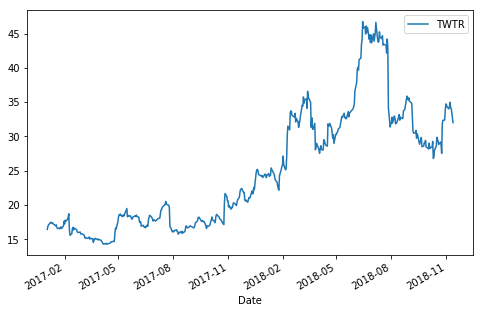

In [30]:
ticker = ['TWTR']
aapl = web.YahooOptions(ticker[0])
aapl_opt = aapl.get_all_data().reset_index()
start_date = '2017-01-01'
closes_aapl = get_historical_closes(ticker, start_date,freq='d')
ret_aapl = calc_daily_ret(closes_aapl)
closes_aapl.plot(figsize=(8,5));
plt.legend(ticker);

In [31]:
 #aapl_opt.loc[(aapl_opt.Type=='put') & (aapl_opt.Strike==np.round(closes_aapl.iloc[-1,0])+10) & (aapl_opt.Expiry==datetime.today().date()+timedelta(days=days_to_valuation))]
aapl_opt.loc[(aapl_opt.Type=='put') & (aapl_opt.Strike==30) ]

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
188,30.0,2018-12-07,put,...,2018-11-12 18:05:25,2018-11-12 15:13:21,"{'contractSymbol': 'TWTR181207P00030000', 'str..."
190,30.0,2018-12-14,put,...,2018-11-12 18:05:25,2018-11-12 16:19:43,"{'contractSymbol': 'TWTR181214P00030000', 'str..."
192,30.0,2018-12-21,put,...,2018-11-12 18:05:25,2018-11-12 17:30:40,"{'contractSymbol': 'TWTR181221P00030000', 'str..."
194,30.0,2019-01-18,put,...,2018-11-12 18:05:25,2018-11-12 17:32:05,"{'contractSymbol': 'TWTR190118P00030000', 'str..."
196,30.0,2019-03-15,put,...,2018-11-12 18:05:25,2018-11-12 16:09:16,"{'contractSymbol': 'TWTR190315P00030000', 'str..."
197,30.0,2019-06-21,put,...,2018-11-12 18:05:25,2018-11-07 20:09:07,"{'contractSymbol': 'TWTR190621P00030000', 'str..."
199,30.0,2020-01-17,put,...,2018-11-12 18:05:25,2018-11-12 16:31:16,"{'contractSymbol': 'TWTR200117P00030000', 'str..."
201,30.0,2021-01-15,put,...,2018-11-12 18:05:25,2018-11-09 14:30:12,"{'contractSymbol': 'TWTR210115P00030000', 'str..."


In [32]:
opt_valuar = aapl_opt.loc[197]
opt_valuar['JSON']

{'ask': 3.95,
 'bid': 3.85,
 'change': 0.0,
 'contractSize': 'REGULAR',
 'contractSymbol': 'TWTR190621P00030000',
 'currency': 'USD',
 'expiration': 1561075200,
 'impliedVolatility': 0.5053760400390624,
 'inTheMoney': False,
 'lastPrice': 3.0,
 'lastTradeDate': 1541621347,
 'openInterest': 641,
 'percentChange': 0.0,
 'strike': 30.0,
 'volume': 180}

In [34]:
put,sigma_est=put_valuation(ret_aapl,opt_valuar)
interval(.99,put,sigma_est)

(3.2451027859767065, 3.535371959894762)
(3.2451027859767065, 3.535371959894762)


In [35]:
put_hist,sigma_est=put_valuation_hist(ret_aapl,opt_valuar)
interval(.99,put_hist,sigma_est)

(3.0235456155777727, 3.3175471689846794)
(3.0235456155777727, 3.3175471689846794)


# Valuacion con opciones a 100 dias

In [39]:
days_to_valuation=100
ticker = ['TWTR']
aapl = web.YahooOptions(ticker[0])
aapl_opt = aapl.get_all_data().reset_index()
start_date = '2017-01-01'
closes_aapl = get_historical_closes(ticker, start_date,freq='d')
ret_aapl = calc_daily_ret(closes_aapl)
closes_aapl.plot(figsize=(8,5));
plt.legend(ticker);
datetime.today().date()+timedelta(days=days_to_valuation)

datetime.date(2019, 2, 20)

In [40]:
aapl_opt.loc[(aapl_opt.Type=='put') & (aapl_opt.Strike==140) ]

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
298,140.0,2018-11-16,put,...,2018-11-12 18:11:24,2018-11-12 17:50:42,"{'contractSymbol': 'FB181116P00140000', 'strik..."
301,140.0,2018-12-14,put,...,2018-11-12 18:11:24,2018-11-12 17:34:29,"{'contractSymbol': 'FB181214P00140000', 'strik..."
303,140.0,2018-12-21,put,...,2018-11-12 18:11:24,2018-11-12 17:56:24,"{'contractSymbol': 'FB181221P00140000', 'strik..."
305,140.0,2018-12-28,put,...,2018-11-12 18:11:24,2018-11-12 17:28:24,"{'contractSymbol': 'FB181228P00140000', 'strik..."
307,140.0,2019-01-18,put,...,2018-11-12 18:11:24,2018-11-12 17:38:25,"{'contractSymbol': 'FB190118P00140000', 'strik..."
309,140.0,2019-06-21,put,...,2018-11-12 18:11:24,2018-11-12 17:33:23,"{'contractSymbol': 'FB190621P00140000', 'strik..."
311,140.0,2019-12-20,put,...,2018-11-12 18:11:24,2018-11-12 17:50:15,"{'contractSymbol': 'FB191220P00140000', 'strik..."
313,140.0,2020-01-17,put,...,2018-11-12 18:11:30,2018-11-12 16:04:07,"{'contractSymbol': 'FB200117P00140000', 'strik..."
315,140.0,2020-06-19,put,...,2018-11-12 18:11:30,2018-11-12 15:08:53,"{'contractSymbol': 'FB200619P00140000', 'strik..."


In [41]:
opt_valuar = aapl_opt.loc[305]
opt_valuar['JSON']

{'ask': 5.35,
 'bid': 5.2,
 'change': 1.6099999,
 'contractSize': 'REGULAR',
 'contractSymbol': 'FB181228P00140000',
 'currency': 'USD',
 'expiration': 1545955200,
 'impliedVolatility': 0.294379614868164,
 'inTheMoney': False,
 'lastPrice': 5.35,
 'lastTradeDate': 1542043704,
 'openInterest': 63,
 'percentChange': 43.048126,
 'strike': 140.0,
 'volume': 39}

In [42]:
put,sigma_est=put_valuation(ret_aapl,opt_valuar)
interval(.99,put,sigma_est)

(5.554137929730538, 5.840719041163275)
(5.554137929730538, 5.840719041163275)


In [43]:
put_hist,sigma_est=put_valuation_hist(ret_aapl,opt_valuar)
interval(.99,put_hist,sigma_est)

(5.128359079695935, 5.407008826787315)
(5.128359079695935, 5.407008826787315)


In [51]:
days_to_valuation=100
ticker = ['TWTR']
aapl = web.YahooOptions(ticker[0])
aapl_opt = aapl.get_all_data().reset_index()
start_date = '2017-01-01'
closes_aapl = get_historical_closes(ticker, start_date,freq='d')
ret_aapl = calc_daily_ret(closes_aapl)
aapl_opt.loc[(aapl_opt.Type=='put') & (aapl_opt.Strike==30) ]

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
188,30.0,2018-12-07,put,...,2018-11-12 18:25:12,2018-11-12 15:13:21,"{'contractSymbol': 'TWTR181207P00030000', 'str..."
190,30.0,2018-12-14,put,...,2018-11-12 18:25:12,2018-11-12 18:04:29,"{'contractSymbol': 'TWTR181214P00030000', 'str..."
192,30.0,2018-12-21,put,...,2018-11-12 18:25:12,2018-11-12 18:03:54,"{'contractSymbol': 'TWTR181221P00030000', 'str..."
194,30.0,2019-01-18,put,...,2018-11-12 18:25:12,2018-11-12 17:58:07,"{'contractSymbol': 'TWTR190118P00030000', 'str..."
196,30.0,2019-03-15,put,...,2018-11-12 18:25:12,2018-11-12 16:09:16,"{'contractSymbol': 'TWTR190315P00030000', 'str..."
197,30.0,2019-06-21,put,...,2018-11-12 18:25:12,2018-11-07 20:09:07,"{'contractSymbol': 'TWTR190621P00030000', 'str..."
199,30.0,2020-01-17,put,...,2018-11-12 18:25:12,2018-11-12 16:31:16,"{'contractSymbol': 'TWTR200117P00030000', 'str..."
201,30.0,2021-01-15,put,...,2018-11-12 18:25:12,2018-11-09 14:30:12,"{'contractSymbol': 'TWTR210115P00030000', 'str..."


In [52]:
opt_valuar = aapl_opt.loc[194]
opt_valuar['JSON']

{'ask': 1.81,
 'bid': 1.78,
 'change': 0.61,
 'contractSize': 'REGULAR',
 'contractSymbol': 'TWTR190118P00030000',
 'currency': 'USD',
 'expiration': 1547769600,
 'impliedVolatility': 0.5092822509765625,
 'inTheMoney': False,
 'lastPrice': 1.75,
 'lastTradeDate': 1542045487,
 'openInterest': 14619,
 'percentChange': 53.508778,
 'strike': 30.0,
 'volume': 189}

In [53]:
put,sigma_est=put_valuation(ret_aapl,opt_valuar)
interval(.99,put,sigma_est)

(1.7326480632339334, 1.874098623989656)
(1.7326480632339334, 1.874098623989656)


In [54]:
put_hist,sigma_est=put_valuation_hist(ret_aapl,opt_valuar)
interval(.99,put_hist,sigma_est)

(1.65469819906268, 1.7956597529312788)
(1.65469819906268, 1.7956597529312788)


La precision con opciones a menos de 100 dias mejoro debido  que los metodos, ya sea el de los rendimientos o el histograma generan precios del subyacente aleatorios, mientras mas dias tenga que generar hacia el futuro mucho mas dispersos estaran por lo que al realizar media y desviacion estandar estos estaran mas desviados.